In [1]:
import numpy as np

from matplotlib import pyplot as plt 
from matplotlib import cm
import BQPDynamics as bqp

plt.rcParams['font.size']=16
plt.rcParams['text.usetex']=True
plt.rcParams['lines.linewidth']= 2.

saveFigs = False 
figDir = "../figures/"

# s-wave gap

In [2]:
### These convert to physical SI uits for a given set up parameters 
Tc = 14.8 ### Tc in Kelvin 
vF = 6.e5 ### Fermi velocity in units of m/s

K = 1./Tc ### This is 1K in units where Tc is one
GHz = K/20.84 ### This is 1GHz in units where Tc is one 
ps = 1./GHz ### This is 1 ps in units where Tc is one 

nm = 1.e3*ps/vF ### This is 1 nm in units where vF = Tc = 1 

BCS_ratio = 1.765387449618725 ### This is the ratio between Delta(0) and Tc approximately 

## Equilibrium Phase Diagram

In [3]:
nTs = 30
nQs = 50

Ts = np.linspace(0.005,1.005,nTs)
Qs = np.linspace(0.,4.,nQs)
T_grid,Q_grid = np.meshgrid(Ts,Qs,indexing='ij')
gap_grid = np.zeros_like(T_grid)
J_grid = np.zeros_like(T_grid)

In [4]:
nxi = 200
nthetas = 100
cutoff = 30.
eq_sim = bqp.BQPDynamics(nxi,nthetas,cutoff)

In [5]:
for i in range(nTs):
    for j in range(nQs):
        Q = [Qs[j],0.]
        gap_grid[i,j] = eq_sim.solve_gap_eq(Q,Ts[i])
        J_grid[i,j] = eq_sim.calc_current( eq_sim.eq_nks(gap_grid[i,j],Q,Ts[i]),Q )[0]

/home/jcurtis/Projects/NoneqBQP/src/BQPDynamics.py:93: RuntimeWarning: overflow encountered in exp
  return 1./(np.exp(self.BQP_doppler(gap,Q)/T) + 1. )
/opt/software/pyenv/202406/versions/3.12.4/lib/python3.12/site-packages/scipy/optimize/_root_scalar.py:315: RuntimeWarning: Derivative was zero.
  r, sol = methodc(f, x0, args=args, fprime=fprime, fprime2=None,


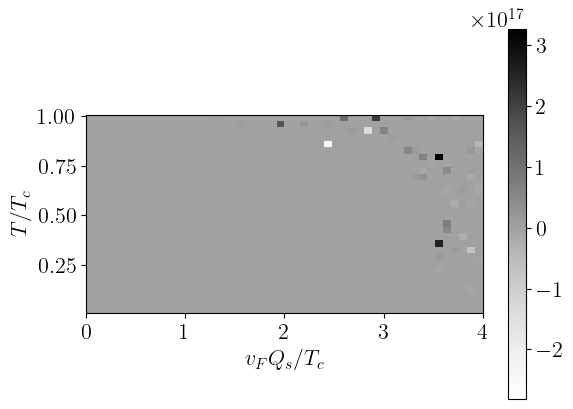

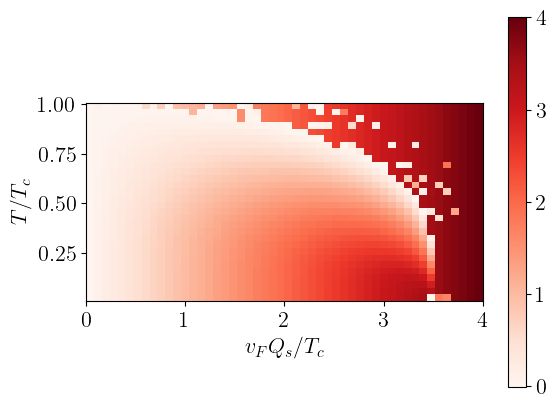

In [6]:
plt.imshow(gap_grid,origin='lower',cmap='Grays',extent=[Qs[0],Qs[-1],Ts[0],Ts[-1]],aspect=2.)
plt.xlabel(r'$v_FQ_s/T_c$')
plt.ylabel(r'$T/T_c$')
plt.colorbar()
plt.show()

plt.imshow(J_grid,origin='lower',cmap='Reds',extent=[Qs[0],Qs[-1],Ts[0],Ts[-1]],aspect=2.)
plt.colorbar()
plt.xlabel(r'$v_FQ_s/T_c$')
plt.ylabel(r'$T/T_c$')
plt.show()

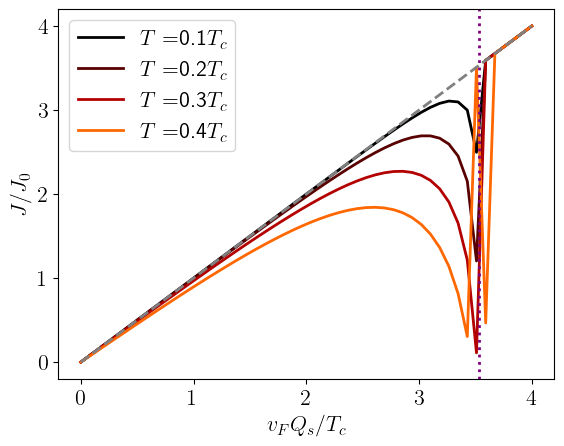

In [7]:
T_indices = [3,6,9,12]
clrs = cm.gist_heat(np.linspace(0.,0.7,len(T_indices)))
for i in range(len(T_indices)):
    T_index = T_indices[i]
    plt.plot(Qs,J_grid[T_index,:],label=r'$T = $'+"{t:0.1f}".format(t=Ts[T_index])+r'$T_c$',color=clrs[i])
plt.plot(Qs,Qs,color='gray',linestyle='dashed')
plt.axvline(2.*BCS_ratio,color='purple',linestyle='dotted')
plt.xlabel(r'$v_FQ_s/T_c$')
plt.ylabel(r'$J/J_0$')
plt.legend()
plt.show()

## Now we investigate the dynamics in response to a current pulse

In [8]:
tpulse = 0.
FWHM = 1.*ps 
Qmax = 2.*BCS_ratio*4.

def Q_t(t):
    return [ Qmax*np.exp( -np.log(2.)* (t-tpulse)**2/(0.5*FWHM)**2 ),0.]

nts = 151
ts = np.linspace(-5.*ps,5.*ps,nts)

rta_rate = 1./(1*ps)
T0 = 7.*K

td_sim = bqp.BQPDynamics(nxi,nthetas,cutoff)

gap0 = td_sim.solve_gap_eq([0.,0.],T0)
nks0 = td_sim.eq_nks(gap0,[0.,0.],T0)

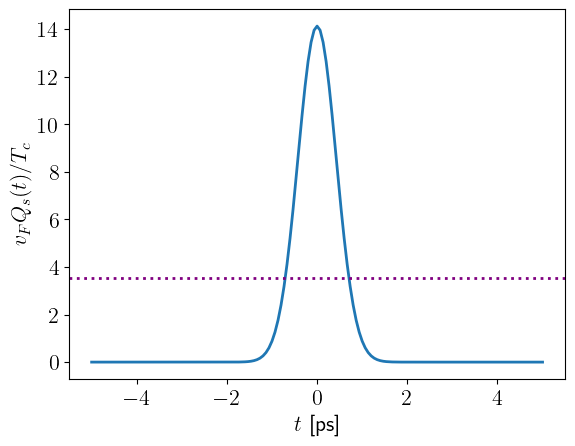

In [9]:
plt.plot(ts/ps,Q_t(ts)[0])
plt.axhline(2.*BCS_ratio,linestyle='dotted',color='purple')
plt.xlabel(r'$t$ [ps]')
plt.ylabel(r'$v_F Q_s(t)/T_c$')
plt.show()

In [10]:
nks_vs_t = td_sim.solve_eom(nks0,Q_t,T0,rta_rate,ts)

/opt/software/pyenv/202406/versions/3.12.4/lib/python3.12/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: The following arguments have no effect for a chosen solver: `maxstep`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)
/opt/software/pyenv/202406/versions/3.12.4/lib/python3.12/site-packages/scipy/optimize/_root_scalar.py:315: RuntimeWarning: Derivative was zero.
  r, sol = methodc(f, x0, args=args, fprime=fprime, fprime2=None,
/home/jcurtis/Projects/NoneqBQP/src/BQPDynamics.py:87: RuntimeWarning: overflow encountered in exp
  return 1./(np.exp(self.BQP_doppler(gap,Q)/T) + 1. )


In [11]:
J_vs_t = td_sim.calc_current(nks_vs_t,Q_t(ts))

In [12]:
gap_vs_t = np.array([ td_sim.solve_gap_nks(nks_vs_t[...,i]) for i in range(nts) ])

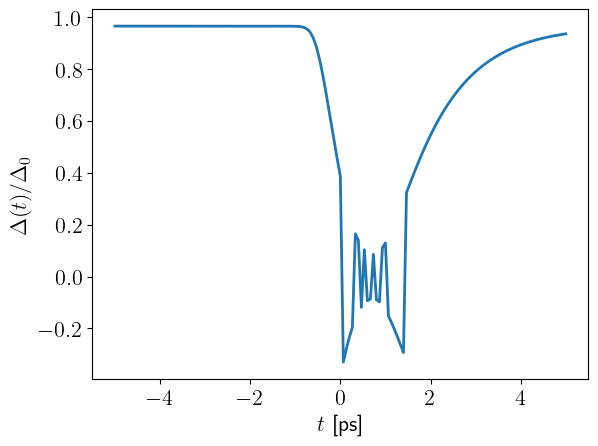

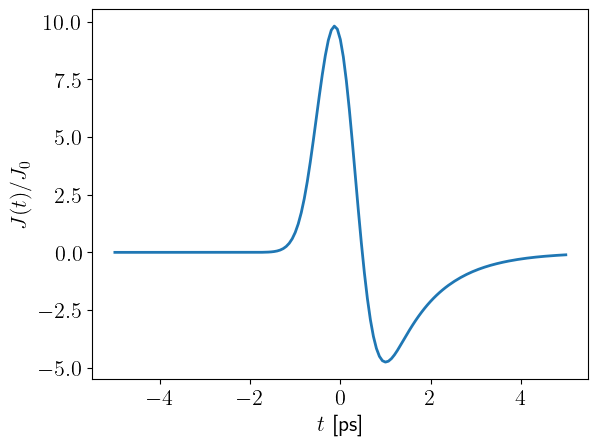

In [13]:
plt.plot(ts/ps,gap_vs_t/BCS_ratio)
plt.xlabel(r'$t$ [ps]')
plt.ylabel(r'$\Delta(t)/\Delta_0$')
plt.show()

plt.plot(ts/ps,J_vs_t[0])
plt.xlabel(r'$t$ [ps]')
plt.ylabel(r'$J(t)/J_0$')
plt.show()

# d-wave gap

In [3]:
### These convert to physical SI uits for a given set up parameters 
Tc = 14.8 ### Tc in Kelvin 
vF = 6.e5 ### Fermi velocity in units of m/s

K = 1./Tc ### This is 1K in units where Tc is one
GHz = K/20.84 ### This is 1GHz in units where Tc is one 
ps = 1./GHz ### This is 1 ps in units where Tc is one 

nm = 1.e3*ps/vF ### This is 1 nm in units where vF = Tc = 1 

## Equilibrium Phase Diagram

In [2]:
nTs = 20
nQs = 70

Ts = np.linspace(0.005,1.005,nTs)
Qs = np.linspace(0.,4.,nQs)
T_grid,Q_grid = np.meshgrid(Ts,Qs,indexing='ij')
gap_grid = np.zeros_like(T_grid)
J_grid = np.zeros_like(T_grid)

In [3]:
nxi = 500
nthetas = 100
cutoff = 40.
eq_sim = bqp.BQPDynamics(nxi,nthetas,cutoff)
eq_sim.set_d_wave()

## Anti-nodal

In [4]:
for i in range(nTs):
    for j in range(nQs):
        Q = [Qs[j],0.]
        gap_grid[i,j] = eq_sim.solve_gap_eq(Q,Ts[i])
        J_grid[i,j] = eq_sim.calc_current( eq_sim.eq_nks(gap_grid[i,j],Q,Ts[i]),Q )[0]

/home/jcurtis/Projects/NoneqBQP/src/BQPDynamics.py:71: RuntimeWarning: overflow encountered in exp
  return 1./(np.exp(self.BQP_doppler(gap,Q)/T) + 1. )


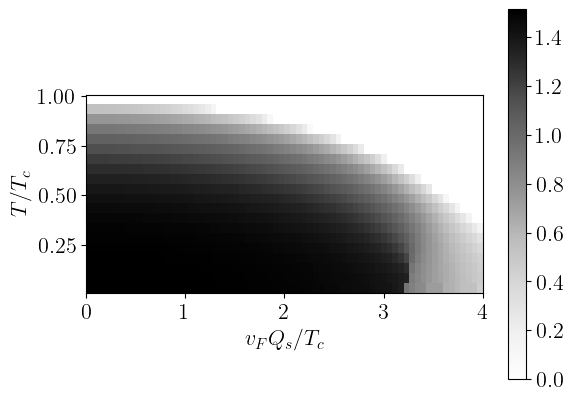

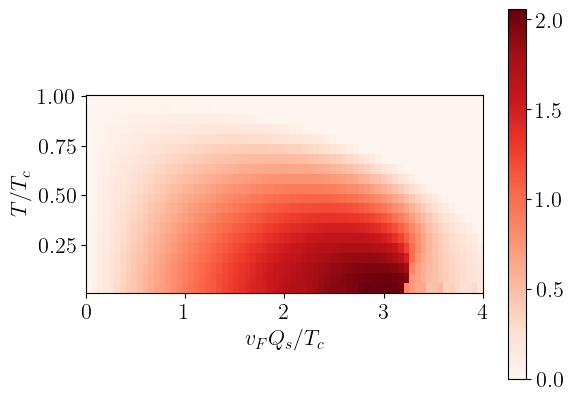

In [5]:
plt.imshow(gap_grid,origin='lower',cmap='Grays',extent=[Qs[0],Qs[-1],Ts[0],Ts[-1]],aspect=2.)
plt.xlabel(r'$v_FQ_s/T_c$')
plt.ylabel(r'$T/T_c$')
plt.colorbar()
plt.show()

plt.imshow(J_grid,origin='lower',cmap='Reds',extent=[Qs[0],Qs[-1],Ts[0],Ts[-1]],aspect=2.)
plt.colorbar()
plt.xlabel(r'$v_FQ_s/T_c$')
plt.ylabel(r'$T/T_c$')
plt.show()

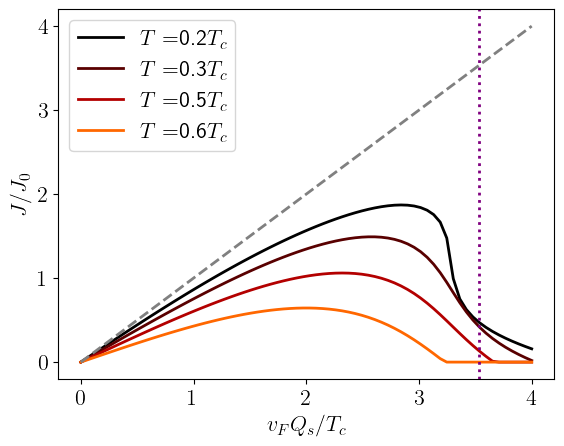

In [7]:
T_indices = [3,6,9,12]
clrs = cm.gist_heat(np.linspace(0.,0.7,len(T_indices)))
for i in range(len(T_indices)):
    T_index = T_indices[i]
    plt.plot(Qs,J_grid[T_index,:],label=r'$T = $'+"{t:0.1f}".format(t=Ts[T_index])+r'$T_c$',color=clrs[i])
plt.plot(Qs,Qs,color='gray',linestyle='dashed')
plt.axvline(2.*bqp.BCS_ratio,color='purple',linestyle='dotted')
plt.xlabel(r'$v_FQ_s/T_c$')
plt.ylabel(r'$J/J_0$')
plt.legend()
plt.show()

## Nodal

In [8]:
for i in range(nTs):
    for j in range(nQs):
        Q = [Qs[j]/np.sqrt(2.),Qs[j]/np.sqrt(2.)]
        gap_grid[i,j] = eq_sim.solve_gap_eq(Q,Ts[i])
        J_grid[i,j] = eq_sim.calc_current( eq_sim.eq_nks(gap_grid[i,j],Q,Ts[i]),Q )[0]

/home/jcurtis/Projects/NoneqBQP/src/BQPDynamics.py:71: RuntimeWarning: overflow encountered in exp
  return 1./(np.exp(self.BQP_doppler(gap,Q)/T) + 1. )


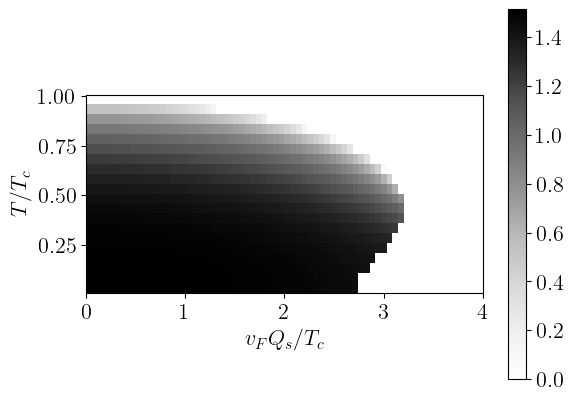

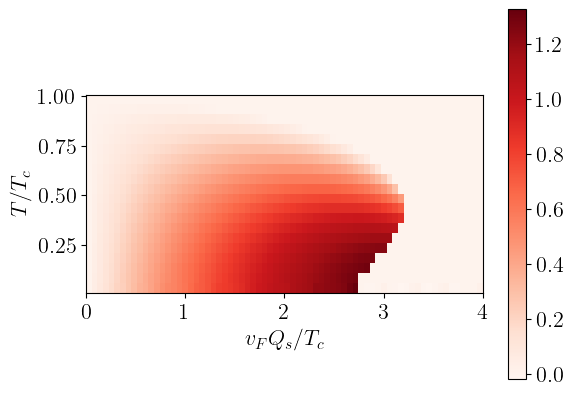

In [9]:
plt.imshow(gap_grid,origin='lower',cmap='Grays',extent=[Qs[0],Qs[-1],Ts[0],Ts[-1]],aspect=2.)
plt.xlabel(r'$v_FQ_s/T_c$')
plt.ylabel(r'$T/T_c$')
plt.colorbar()
plt.show()

plt.imshow(J_grid,origin='lower',cmap='Reds',extent=[Qs[0],Qs[-1],Ts[0],Ts[-1]],aspect=2.)
plt.colorbar()
plt.xlabel(r'$v_FQ_s/T_c$')
plt.ylabel(r'$T/T_c$')
plt.show()

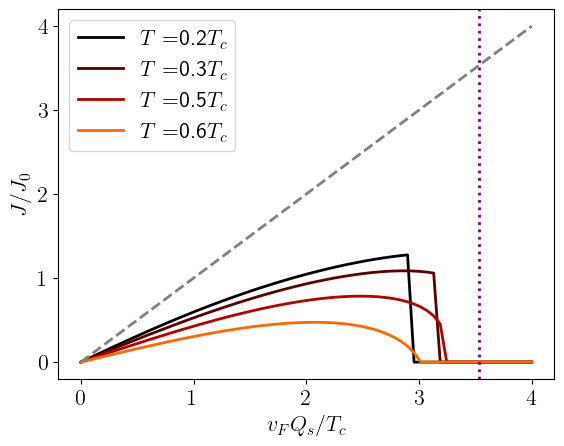

In [10]:
T_indices = [3,6,9,12]
clrs = cm.gist_heat(np.linspace(0.,0.7,len(T_indices)))
for i in range(len(T_indices)):
    T_index = T_indices[i]
    plt.plot(Qs,J_grid[T_index,:],label=r'$T = $'+"{t:0.1f}".format(t=Ts[T_index])+r'$T_c$',color=clrs[i])
plt.plot(Qs,Qs,color='gray',linestyle='dashed')
plt.axvline(2.*bqp.BCS_ratio,color='purple',linestyle='dotted')
plt.xlabel(r'$v_FQ_s/T_c$')
plt.ylabel(r'$J/J_0$')
plt.legend()
plt.show()

## Now we investigate the dynamics in response to a current pulse

In [238]:
tpulse = 0.
FWHM = 1.*ps 
Qmax = 2.*BCS_ratio*4.

def Q_t(t):
    return [ Qmax*np.exp( -np.log(2.)* (t-tpulse)**2/(0.5*FWHM)**2 ),0.]

nts = 151
ts = np.linspace(-5.*ps,5.*ps,nts)

rta_rate = 1./(1*ps)
T0 = 7.*K

td_sim = bqp.BQPDynamics(nxi,nthetas,cutoff)

gap0 = td_sim.solve_gap_eq([0.,0.],T0)
nks0 = td_sim.eq_nks(gap0,[0.,0.],T0)

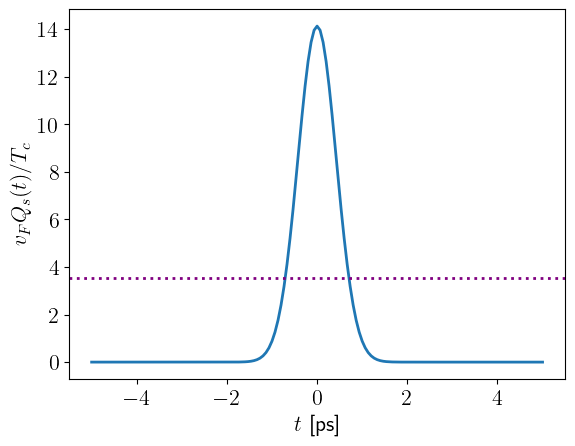

In [239]:
plt.plot(ts/ps,Q_t(ts)[0])
plt.axhline(2.*BCS_ratio,linestyle='dotted',color='purple')
plt.xlabel(r'$t$ [ps]')
plt.ylabel(r'$v_F Q_s(t)/T_c$')
plt.show()

In [240]:
nks_vs_t = td_sim.solve_eom(nks0,Q_t,T0,rta_rate,ts)

In [241]:
J_vs_t = td_sim.calc_current(nks_vs_t,Q_t(ts))

In [242]:
gap_vs_t = np.array([ td_sim.solve_gap_nks(nks_vs_t[...,i]) for i in range(nts) ])

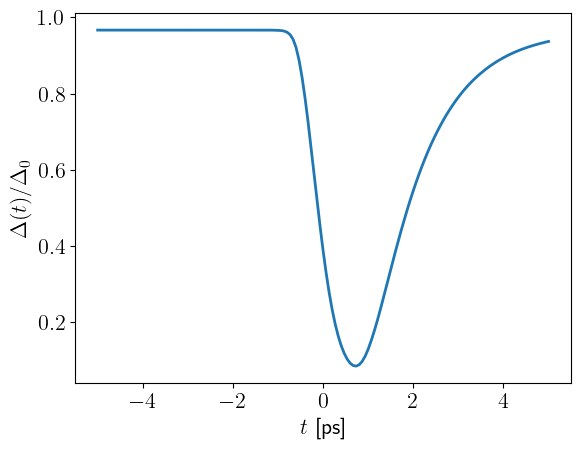

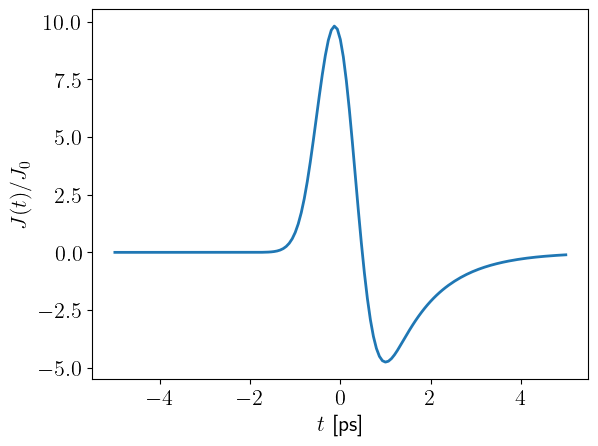

In [243]:
plt.plot(ts/ps,gap_vs_t/BCS_ratio)
plt.xlabel(r'$t$ [ps]')
plt.ylabel(r'$\Delta(t)/\Delta_0$')
plt.show()

plt.plot(ts/ps,J_vs_t[0])
plt.xlabel(r'$t$ [ps]')
plt.ylabel(r'$J(t)/J_0$')
plt.show()